In [2]:

import pandas as pd
from sklearn.datasets import load_iris
from pandas import util
import seaborn as sns


In [3]:

pd.options.plotting.backend = "holoviews"

In [4]:

data = load_iris()

In [5]:

df = util.testing.makeTimeDataFrame()

/home/gonluisr/miniconda3/envs/conda_dev/lib/python3.9/site-packages/pandas/util/__init__.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing


In [6]:
#|output: true
df.head()

,A,B,C,D
2000-01-03,1.126988,-1.147395,0.187442,-0.630229
2000-01-04,1.201789,-0.000927,0.723552,-0.852234
2000-01-05,-0.468707,0.151884,-0.785213,0.847470
2000-01-06,1.116639,0.803649,1.077325,-1.361432
2000-01-07,0.155205,-1.248513,0.752966,-0.201408


In [7]:

df.reset_index().rename(columns={'index':'Date'}).groupby([pd.Grouper(key='Date',freq='M')]).sum()

,A,B,C,D
Date,,,,
2000-01-31,5.767612,-0.264180,5.102825,0.220061
2000-02-29,1.149543,-2.713967,1.188419,1.265752


In [8]:

df = df.assign(max_value = df.max(axis=1))

In [9]:

def classify(df):
    if df['max_value'] >= 1:
        return 'High'
    if df['max_value'] > 0.5 and df['max_value'] < 1:
        return 'Medium'
    if df['max_value'] < 0.5:
        return 'Low'

In [10]:

df = df.assign(Category = df.apply(classify,axis=1))

In [11]:

df['Category'] = df['Category'].astype("category")

In [12]:

df

,A,B,C,D,max_value,Category
2000-01-03,1.126988,-1.147395,0.187442,-0.630229,1.126988,High
2000-01-04,1.201789,-0.000927,0.723552,-0.852234,1.201789,High
2000-01-05,-0.468707,0.151884,-0.785213,0.847470,0.847470,Medium
2000-01-06,1.116639,0.803649,1.077325,-1.361432,1.116639,High
2000-01-07,0.155205,-1.248513,0.752966,-0.201408,0.752966,Medium
2000-01-10,-1.106183,-1.103509,0.734816,-1.539371,0.734816,Medium
2000-01-11,0.749808,0.457427,0.236783,0.007655,0.749808,Medium
2000-01-12,1.345924,-0.701440,0.402120,1.055362,1.345924,High
2000-01-13,-1.630626,-1.373218,1.154692,0.145866,1.154692,High
2000-01-14,0.985955,-0.233816,-0.108853,2.763228,2.763228,High


See @fig-plot and @fig-plot-copy

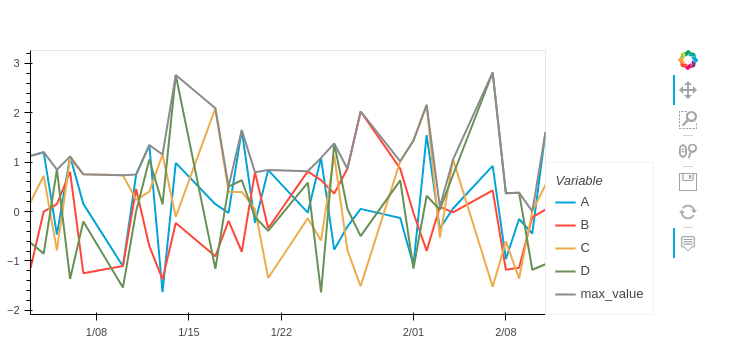{#fig-plot}

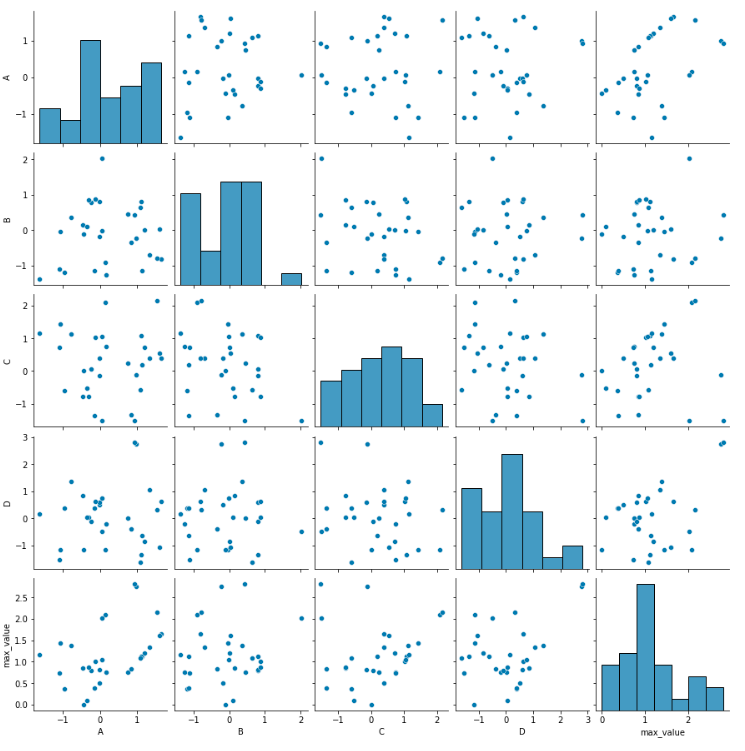{#fig-plot-copy}


In [1]:
#| echo: false
#| label: fig-plot-copy
#| fig-cap: Holoviews example
# df.plot()

In [2]:
#| echo: false
#| label: fig-pairplot
#| fig-cap: Seaborn pairplot example
#sns.pairplot(df);